### UC Berkeley, MICS, W202-Cryptography
### Week 05 Breakout 2
### Elliptic Curves - Prime Curves (over a finite field in modulo prime GF(p)), verifying singularity of a prime curve, verifying points on a prime curve, listing all points on a prime curve, plotting all points on a prime curve

Elliptic Curve Prime Curves are over finite fields in modulo prime, GF(p), very much like our discrete logarithms we previous studied.

They are based on the same Weierstrass Equation, but in modulo prime p:

y^2 = x^3 + Ax + B (mod p)

(Remember our notation, the (mod p) applies to the whole equation!)

We will start by validating some elliptic curve prime curves for non-singularity.  We will be using the same test, but it will be in modulo p:

4 A^3 + 27 B^2 not equal 0 (mod p)

We will then validate some points on various elliptic curve prime curves.  Just like the real numbers, not every combination of x and y will be a valid point.  We have to plug x and y into the Weierstrass Equation, calculate the left size of the equation, calculate the right size of the equation, and validate that both match!

(We will learn in coming weeks that validation of points is extremely important.  For example, submitting an invalid point to Diffie Hellman Elliptic Curve Key Exchange can form the basis of an Invalid Curve Attack. Validating points guards against this attack.)

We will then look at some example elliptic curve prime curves, see how many points they have, list out the points, and show the validation of each point.

Finally, we will graph some prime curves from mod 13 to mod 499. They will not look like the nice prototypical elliptic curve seen in textbooks for real numbers.  They will look like a scatter plot that is distributed along complex patterns.

Note: these numbers are ridiculously small for the purposes of learning.  Secure cryptography systems based on elliptic curve prime curves must use large prime numbers!

In [1]:
from sage.all import *

In [2]:
def my_format_plus_minus(x):
    "given an integer, format it with a plus or minus, a blank, and the integer"
    
    if x < 0:
        s = "- " + str(abs(x))
    else:
        s = "+ " + str(abs(x))
    
    return s

#### Examples of validating an Elliptic Curve Prime Curve to be non-singular.  Examples below will include those that are singular and those that are non-singular so you can see the difference.

In [3]:
def my_validate_elliptic_curve_non_singular(A, B, p):
    "given A, B, p, validate that the elliptic curve will be non-singular, that is 4 A^3 + 27 B^2 not equal 0"
    
    A_string = my_format_plus_minus(A)
    B_string = my_format_plus_minus(B)
    
    print ("\nValidating the Elliptic Curve to ensure it's non-singular:  y^2 = x^3 " + A_string + "x " + B_string + " (mod " + str(p) + ")\n")
    
    t = (4 * (A ** 3) + 27 * (B ** 2)) % p
    
    print ("4 A^3 + 27 B^2 (mod " + str(p) + ") = 4 * (" + str(A) + "^3) + 27 * (" + str(B) + "^2) (mod " + str(p) + ") = " + str(t) + "\n")
    
    if  t == 0:
        print ("Curve is singular - NOT acceptable")
    else:
        print ("Curve is non-singular - acceptable")

In [4]:
A = 3
B = 8
p = 3

my_validate_elliptic_curve_non_singular(A, B, p)


Validating the Elliptic Curve to ensure it's non-singular:  y^2 = x^3 + 3x + 8 (mod 3)

4 A^3 + 27 B^2 (mod 3) = 4 * (3^3) + 27 * (8^2) (mod 3) = 0

Curve is singular - NOT acceptable


In [5]:
A = 5
B = 15
p = 5

my_validate_elliptic_curve_non_singular(A, B, p)


Validating the Elliptic Curve to ensure it's non-singular:  y^2 = x^3 + 5x + 15 (mod 5)

4 A^3 + 27 B^2 (mod 5) = 4 * (5^3) + 27 * (15^2) (mod 5) = 0

Curve is singular - NOT acceptable


In [6]:
A = 14
B = 21
p = 7

my_validate_elliptic_curve_non_singular(A, B, p)


Validating the Elliptic Curve to ensure it's non-singular:  y^2 = x^3 + 14x + 21 (mod 7)

4 A^3 + 27 B^2 (mod 7) = 4 * (14^3) + 27 * (21^2) (mod 7) = 0

Curve is singular - NOT acceptable


In [7]:
A = 4
B = 3
p = 3

my_validate_elliptic_curve_non_singular(A, B, p)


Validating the Elliptic Curve to ensure it's non-singular:  y^2 = x^3 + 4x + 3 (mod 3)

4 A^3 + 27 B^2 (mod 3) = 4 * (4^3) + 27 * (3^2) (mod 3) = 1

Curve is non-singular - acceptable


In [8]:
A = 4
B = 3
p = 5

my_validate_elliptic_curve_non_singular(A, B, p)


Validating the Elliptic Curve to ensure it's non-singular:  y^2 = x^3 + 4x + 3 (mod 5)

4 A^3 + 27 B^2 (mod 5) = 4 * (4^3) + 27 * (3^2) (mod 5) = 4

Curve is non-singular - acceptable


In [9]:
A = 4
B = 3
p = 7

my_validate_elliptic_curve_non_singular(A, B, p)


Validating the Elliptic Curve to ensure it's non-singular:  y^2 = x^3 + 4x + 3 (mod 7)

4 A^3 + 27 B^2 (mod 7) = 4 * (4^3) + 27 * (3^2) (mod 7) = 2

Curve is non-singular - acceptable


#### Examples of validating points as valid or invalid over an Elliptic Curve Prime Curve

(This will become really important later when we study Invalid Curve Attacks in which a Diffie Hellman Elliptic Curve Key Exchange accepts a point without validating it which opens the door to an invalid curve attack)

In [10]:
def my_format_point(pt):
    "Given a point on an elliptic curve, format it"
    
    if pt[2] == 0:
        s = "INFINITY"
    else:
        s = "(" + str(pt[0]) + ", " + str(pt[1]) + ")"
        
    return s

In [11]:
def my_validate_point_1(A, B, p, pt):
    "Given A, B, p which define an elliptic curve, and a point pt, validate pt is indeed a point on the elliptic curve"
    
    A_string = my_format_plus_minus(A)
    B_string = my_format_plus_minus(B)
    
    y_side = (pt[1] ** 2) % p    
    x_side = (pt[0] ** 3 + A * pt[0] + B) % p
    
    print ("        y^2 (mod " + str(p) + ") = " + str(pt[1]) + "^2 (mod " + str(p) + ") = " + str(y_side))
    print ("        x^3 " + A_string + "x " + B_string + " (mod " + str(p) + ") = " + str(pt[0]) + "^3 " + A_string \
                + "*" + str(pt[0]) + " " + B_string + " (mod " + str(p) + ") = " + str(x_side) + "\n")
        
    if y_side == x_side:
        print ("        valid point")
    else:
        print ("        invalid point")

In [12]:
def my_given_elliptic_curve_validate_point(A, B, p, pt_1):
    "Print a nice header and validate a point using my_verify_point()"
    
    A_string = my_format_plus_minus(A)
    B_string = my_format_plus_minus(B)
    
    E = EllipticCurve(GF(p),[A,B])
    
    print ("\nElliptic Curve: y^2 = x^3 " + A_string + "x " + B_string + " (mod " + str(p) + ")\n")
    
    my_validate_point_1(A, B, p, pt_1)

In [13]:
A = 4
B = 3
p = 7
pt = (3,4)

my_given_elliptic_curve_validate_point(A, B, p, pt)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 7)

        y^2 (mod 7) = 4^2 (mod 7) = 2
        x^3 + 4x + 3 (mod 7) = 3^3 + 4*3 + 3 (mod 7) = 0

        invalid point


In [14]:
A = 4
B = 3
p = 7
pt = (5,1)

my_given_elliptic_curve_validate_point(A, B, p, pt)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 7)

        y^2 (mod 7) = 1^2 (mod 7) = 1
        x^3 + 4x + 3 (mod 7) = 5^3 + 4*5 + 3 (mod 7) = 1

        valid point


In [15]:
A = 4
B = 3
p = 11

pt = (2,3)

my_given_elliptic_curve_validate_point(A, B, p, pt)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 11)

        y^2 (mod 11) = 3^2 (mod 11) = 9
        x^3 + 4x + 3 (mod 11) = 2^3 + 4*2 + 3 (mod 11) = 8

        invalid point


In [16]:
A = 4
B = 3
p = 11

pt = (9,8)

my_given_elliptic_curve_validate_point(A, B, p, pt)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 11)

        y^2 (mod 11) = 8^2 (mod 11) = 9
        x^3 + 4x + 3 (mod 11) = 9^3 + 4*9 + 3 (mod 11) = 9

        valid point


In [17]:
A = 4
B = 3
p = 13

pt = (5,8)

my_given_elliptic_curve_validate_point(A, B, p, pt)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 13)

        y^2 (mod 13) = 8^2 (mod 13) = 12
        x^3 + 4x + 3 (mod 13) = 5^3 + 4*5 + 3 (mod 13) = 5

        invalid point


In [18]:
A = 4
B = 3
p = 13

pt = (10,4)

my_given_elliptic_curve_validate_point(A, B, p, pt)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 13)

        y^2 (mod 13) = 4^2 (mod 13) = 3
        x^3 + 4x + 3 (mod 13) = 10^3 + 4*10 + 3 (mod 13) = 3

        valid point


#### Examples of listing all points and showing the validation for the points for various Elliptic Curve Prime Curves

In [19]:
def my_validate_point_2(A, B, p, pt):
    "Given A, B, p which define an elliptic curve, and a point pt, validate pt is indeed a point on the elliptic curve"
    
    A_string = my_format_plus_minus(A)
    B_string = my_format_plus_minus(B)
    
    if pt[2] == 0:
        print ("        (Infinity is always a valid point by definition)")
    else:
        y_side = (pt[1] ** 2) % p
        x_side = (pt[0] ** 3 + A * pt[0] + B) % p
        print ("        y^2 (mod " + str(p) + ") = " + str(pt[1]) + "^2 (mod " + str(p) + ") = " + str(y_side))
        print ("        x^3 " + A_string + "x " + B_string + " (mod " + str(p) + ") = " + str(pt[0]) + "^3 " + A_string \
                + "*" + str(pt[0]) + " " + B_string + " (mod " + str(p) + ") = " + str(x_side))
        
        if y_side == x_side:
            print ("        valid point")
        else:
            print ("        invalid point")

In [20]:
def my_elliptic_curve_prime_list_points(A, B, p):
    "Given A, B, and p, create an elliptic curve prime curve and write out the points, including infinity"
    
    A_string = my_format_plus_minus(A)
    B_string = my_format_plus_minus(B)
    
    E = EllipticCurve(GF(p),[A,B])
    
    print ("\nElliptic Curve: y^2 = x^3 " + A_string + "x " + B_string + " (mod " + str(p) + ")\n")
    print ("Total Points:", len(E.points()), "\n")
    
    for pt in E.points():
        print (my_format_point(pt))
        my_validate_point_2(A, B, p, pt)

In [21]:
A = 4
B = 3
p = 3

my_elliptic_curve_prime_list_points(A, B, p)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 3)

Total Points: 4 

(0, 0)
        y^2 (mod 3) = 0^2 (mod 3) = 0
        x^3 + 4x + 3 (mod 3) = 0^3 + 4*0 + 3 (mod 3) = 0
        valid point
INFINITY
        (Infinity is always a valid point by definition)
(2, 1)
        y^2 (mod 3) = 1^2 (mod 3) = 1
        x^3 + 4x + 3 (mod 3) = 2^3 + 4*2 + 3 (mod 3) = 1
        valid point
(2, 2)
        y^2 (mod 3) = 2^2 (mod 3) = 1
        x^3 + 4x + 3 (mod 3) = 2^3 + 4*2 + 3 (mod 3) = 1
        valid point


In [22]:
A = 4
B = 3
p = 5

my_elliptic_curve_prime_list_points(A, B, p)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 5)

Total Points: 3 

INFINITY
        (Infinity is always a valid point by definition)
(2, 2)
        y^2 (mod 5) = 2^2 (mod 5) = 4
        x^3 + 4x + 3 (mod 5) = 2^3 + 4*2 + 3 (mod 5) = 4
        valid point
(2, 3)
        y^2 (mod 5) = 3^2 (mod 5) = 4
        x^3 + 4x + 3 (mod 5) = 2^3 + 4*2 + 3 (mod 5) = 4
        valid point


In [23]:
A = 4
B = 3
p = 7

my_elliptic_curve_prime_list_points(A, B, p)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 7)

Total Points: 6 

INFINITY
        (Infinity is always a valid point by definition)
(1, 1)
        y^2 (mod 7) = 1^2 (mod 7) = 1
        x^3 + 4x + 3 (mod 7) = 1^3 + 4*1 + 3 (mod 7) = 1
        valid point
(1, 6)
        y^2 (mod 7) = 6^2 (mod 7) = 1
        x^3 + 4x + 3 (mod 7) = 1^3 + 4*1 + 3 (mod 7) = 1
        valid point
(3, 0)
        y^2 (mod 7) = 0^2 (mod 7) = 0
        x^3 + 4x + 3 (mod 7) = 3^3 + 4*3 + 3 (mod 7) = 0
        valid point
(5, 1)
        y^2 (mod 7) = 1^2 (mod 7) = 1
        x^3 + 4x + 3 (mod 7) = 5^3 + 4*5 + 3 (mod 7) = 1
        valid point
(5, 6)
        y^2 (mod 7) = 6^2 (mod 7) = 1
        x^3 + 4x + 3 (mod 7) = 5^3 + 4*5 + 3 (mod 7) = 1
        valid point


In [24]:
A = 4
B = 3
p = 11

my_elliptic_curve_prime_list_points(A, B, p)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 11)

Total Points: 14 

INFINITY
        (Infinity is always a valid point by definition)
(0, 5)
        y^2 (mod 11) = 5^2 (mod 11) = 3
        x^3 + 4x + 3 (mod 11) = 0^3 + 4*0 + 3 (mod 11) = 3
        valid point
(0, 6)
        y^2 (mod 11) = 6^2 (mod 11) = 3
        x^3 + 4x + 3 (mod 11) = 0^3 + 4*0 + 3 (mod 11) = 3
        valid point
(3, 3)
        y^2 (mod 11) = 3^2 (mod 11) = 9
        x^3 + 4x + 3 (mod 11) = 3^3 + 4*3 + 3 (mod 11) = 9
        valid point
(3, 8)
        y^2 (mod 11) = 8^2 (mod 11) = 9
        x^3 + 4x + 3 (mod 11) = 3^3 + 4*3 + 3 (mod 11) = 9
        valid point
(5, 4)
        y^2 (mod 11) = 4^2 (mod 11) = 5
        x^3 + 4x + 3 (mod 11) = 5^3 + 4*5 + 3 (mod 11) = 5
        valid point
(5, 7)
        y^2 (mod 11) = 7^2 (mod 11) = 5
        x^3 + 4x + 3 (mod 11) = 5^3 + 4*5 + 3 (mod 11) = 5
        valid point
(6, 1)
        y^2 (mod 11) = 1^2 (mod 11) = 1
        x^3 + 4x + 3 (mod 11) = 6^3 + 4*6 + 3 (mod 11) = 1
       

In [25]:
A = 4
B = 3
p = 13

my_elliptic_curve_prime_list_points(A, B, p)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 13)

Total Points: 16 

INFINITY
        (Infinity is always a valid point by definition)
(0, 4)
        y^2 (mod 13) = 4^2 (mod 13) = 3
        x^3 + 4x + 3 (mod 13) = 0^3 + 4*0 + 3 (mod 13) = 3
        valid point
(0, 9)
        y^2 (mod 13) = 9^2 (mod 13) = 3
        x^3 + 4x + 3 (mod 13) = 0^3 + 4*0 + 3 (mod 13) = 3
        valid point
(3, 4)
        y^2 (mod 13) = 4^2 (mod 13) = 3
        x^3 + 4x + 3 (mod 13) = 3^3 + 4*3 + 3 (mod 13) = 3
        valid point
(3, 9)
        y^2 (mod 13) = 9^2 (mod 13) = 3
        x^3 + 4x + 3 (mod 13) = 3^3 + 4*3 + 3 (mod 13) = 3
        valid point
(6, 3)
        y^2 (mod 13) = 3^2 (mod 13) = 9
        x^3 + 4x + 3 (mod 13) = 6^3 + 4*6 + 3 (mod 13) = 9
        valid point
(6, 10)
        y^2 (mod 13) = 10^2 (mod 13) = 9
        x^3 + 4x + 3 (mod 13) = 6^3 + 4*6 + 3 (mod 13) = 9
        valid point
(7, 6)
        y^2 (mod 13) = 6^2 (mod 13) = 10
        x^3 + 4x + 3 (mod 13) = 7^3 + 4*7 + 3 (mod 13) = 10
   

#### Examples of graphing Elliptic Curve Prime Curves (they don't look like the prototypical elliptic curves over real numbers)

In [26]:
def my_elliptic_curve_prime_graph(A, B, p, figure_size, marker_size):
    "Given A, B, and p, create an elliptic curve prime curve and graph it"
    
    A_string = my_format_plus_minus(A)
    B_string = my_format_plus_minus(B)
    
    E = EllipticCurve(GF(p),[A,B])
    
    print ("\nElliptic Curve: y^2 = x^3 " + A_string + "x " + B_string + " (mod " + str(p) + ")\n")
    print ("Total Points:", len(E.points()), "\n")
    
    points_list = []
    
    for pt in E.points():
        if pt[2] != 0:
            points_list.append((pt[0],pt[1]))
        
    if len(points_list) < 100:
        print (points_list, "\n")
    
    show(scatter_plot(points_list, markersize = marker_size, figsize = figure_size))
    


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 13)

Total Points: 16 

[(0, 4), (0, 9), (3, 4), (3, 9), (6, 3), (6, 10), (7, 6), (7, 7), (8, 1), (8, 12), (9, 1), (9, 12), (10, 4), (10, 9), (11, 0)] 



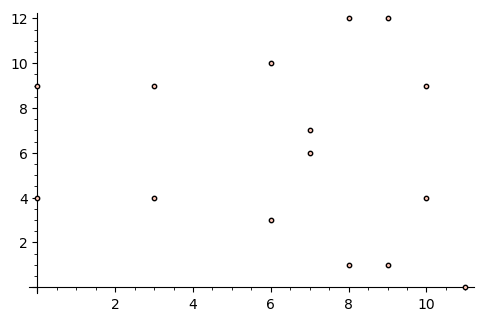

In [27]:
figure_size = 5
marker_size = 10

A = 4
B = 3
p = 13

my_elliptic_curve_prime_graph(A, B, p, figure_size, marker_size)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 53)

Total Points: 48 

[(3, 25), (3, 28), (5, 25), (5, 28), (8, 21), (8, 32), (10, 6), (10, 47), (11, 0), (14, 10), (14, 43), (15, 24), (15, 29), (16, 20), (16, 33), (18, 17), (18, 36), (24, 14), (24, 39), (25, 26), (25, 27), (27, 5), (27, 48), (30, 26), (30, 27), (34, 8), (34, 45), (36, 2), (36, 51), (38, 15), (38, 38), (41, 20), (41, 33), (42, 18), (42, 35), (45, 25), (45, 28), (47, 9), (47, 44), (48, 21), (48, 32), (49, 20), (49, 33), (50, 21), (50, 32), (51, 26), (51, 27)] 



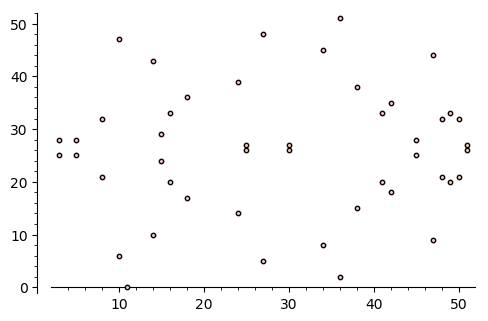

In [28]:
figure_size = 5
marker_size = 10

A = 4
B = 3
p = 53

my_elliptic_curve_prime_graph(A, B, p, figure_size, marker_size)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 97)

Total Points: 90 

[(0, 10), (0, 87), (1, 28), (1, 69), (6, 7), (6, 90), (8, 16), (8, 81), (9, 34), (9, 63), (10, 48), (10, 49), (12, 18), (12, 79), (15, 25), (15, 72), (16, 34), (16, 63), (20, 41), (20, 56), (21, 6), (21, 91), (27, 43), (27, 54), (28, 40), (28, 57), (29, 8), (29, 89), (32, 4), (32, 93), (33, 45), (33, 52), (34, 35), (34, 62), (35, 12), (35, 85), (36, 7), (36, 90), (37, 48), (37, 49), (41, 11), (41, 86), (42, 32), (42, 65), (44, 10), (44, 87), (45, 15), (45, 82), (50, 48), (50, 49), (51, 29), (51, 68), (52, 13), (52, 84), (53, 10), (53, 87), (55, 7), (55, 90), (56, 46), (56, 51), (58, 38), (58, 59), (59, 47), (59, 50), (61, 32), (61, 65), (64, 42), (64, 55), (66, 35), (66, 62), (67, 25), (67, 72), (70, 0), (72, 34), (72, 63), (79, 4), (79, 93), (80, 39), (80, 58), (83, 4), (83, 93), (85, 19), (85, 78), (91, 32), (91, 65), (94, 35), (94, 62), (96, 17), (96, 80)] 



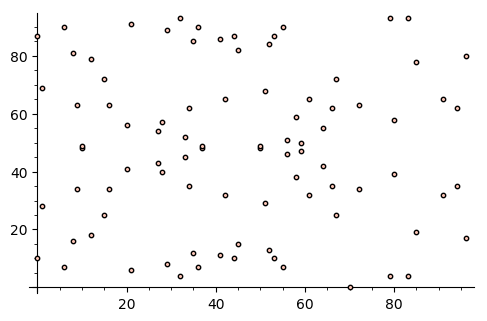

In [29]:
figure_size = 5
marker_size = 10

A = 4
B = 3
p = 97

my_elliptic_curve_prime_graph(A, B, p, figure_size, marker_size)


Elliptic Curve: y^2 = x^3 + 4x + 3 (mod 251)

Total Points: 233 



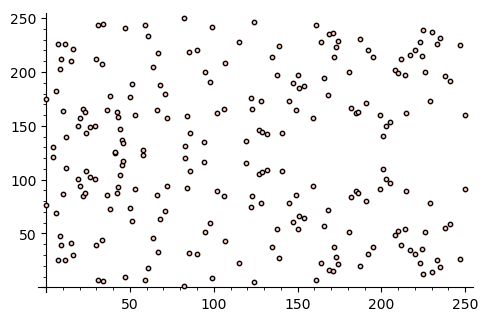

In [30]:
figure_size = 5
marker_size = 10

A = 4
B = 3
p = 251

my_elliptic_curve_prime_graph(A, B, p, figure_size, marker_size)


Elliptic Curve: y^2 = x^3 + 4x + 5 (mod 499)

Total Points: 524 



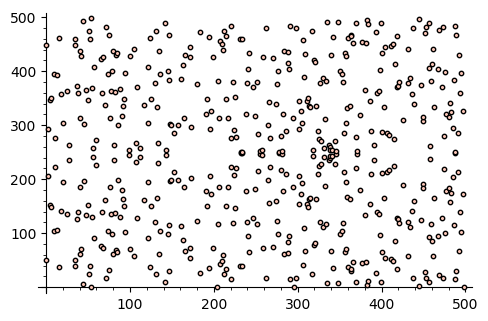

In [31]:
figure_size = 5
marker_size = 10

A = 4
B = 5
p = 499

my_elliptic_curve_prime_graph(A, B, p, figure_size, marker_size)